In [ ]:
import pandas as pd
import numpy as np

### Load Data set

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/sales.csv', parse_dates=['date'])
print(df.head())

        date  gender      region  sales
0 2022-08-22    Male  North-West  20381
1 2022-03-05    Male  North-East  14495
2 2022-02-09    Male  North-East  13510
3 2022-06-22    Male  North-East  15983
4 2022-08-10  Female  North-West  15007


### Creating a Pandas GroupBy Object

In [ ]:
print(df.groupby('region'))

### counting number of groups

In [ ]:
print(df.groupby('region').ngroups)

3


### Accessing the Groups in a GroupBy object


In [ ]:
print(df.groupby('region').groups)

{'North-East': [1, 2, 3, 12, 13, 14, 15, 18, 19, 23, 24, 25, 26, 28, 31, 35, 40, 41, 45, 50, 51, 58, 59, 60, 63, 64, 67, 68, 72, 75, 76, 77, 80, 82, 83, 85, 87, 92, 94, 100, 105, 108, 109, 112, 113, 114, 115, 120, 121, 125, 127, 130, 134, 138, 139, 140, 141, 142, 146, 149, 155, 157, 164, 165, 176, 177, 179, 180, 188, 191, 193, 195, 199, 201, 205, 207, 211, 216, 218, 222, 224, 228, 231, 236, 242, 243, 246, 249, 254, 256, 259, 264, 265, 271, 272, 280, 283, 287, 288, 289, ...], 'North-West': [0, 4, 7, 11, 16, 17, 21, 29, 30, 34, 36, 38, 39, 42, 43, 44, 46, 48, 49, 52, 55, 56, 62, 66, 70, 71, 74, 79, 88, 89, 90, 91, 95, 98, 99, 103, 106, 116, 117, 119, 122, 123, 128, 129, 132, 137, 143, 144, 147, 148, 151, 153, 154, 156, 160, 161, 169, 171, 175, 178, 184, 185, 186, 198, 204, 206, 209, 212, 217, 221, 223, 225, 230, 233, 234, 235, 237, 240, 244, 251, 252, 253, 255, 260, 261, 263, 266, 267, 277, 278, 281, 285, 290, 291, 296, 297, 300, 318, 320, 321, ...], 'South': [5, 6, 8, 9, 10, 20, 22, 27,

### Accessing only Group Names of a GroupBy Object

In [ ]:
print(df.groupby('region').groups.keys())

### Selecting a particular Group

In [ ]:
print(df.groupby('region').get_group('South'))

### Findout average Sales per region

In [ ]:
averages = df.groupby('region')['sales'].mean()
print(averages)

### Applying Multiple Aggregations Using Pandas GroupBy
Find out Mean, median and variance of sales per region

In [ ]:
aggs = df.groupby('region')['sales'].agg([np.mean, np.std, np.var])
print(aggs)

### Calculate percentage of region's sales per row with respect to total sale of the region

In [ ]:
df['Percent Of Region Sales'] = df['sales'] / df.groupby('region')['sales'].transform('sum')
print(df.head())

        date  gender      region  sales  Percent Of Region Sales
0 2022-08-22    Male  North-West  20381                 0.004148
1 2022-03-05    Male  North-East  14495                 0.002403
2 2022-02-09    Male  North-East  13510                 0.002239
3 2022-06-22    Male  North-East  15983                 0.002649
4 2022-08-10  Female  North-West  15007                 0.003055


### Filtering Rows Where the Group's Average Sale Price is Less Than 20,000

In [ ]:
df = df.groupby('region').filter(lambda x: x['sales'].mean() < 20000)
print(df.head())


        date  gender      region  sales  Percent Of Region Sales
0 2022-08-22    Male  North-West  20381                 0.004148
1 2022-03-05    Male  North-East  14495                 0.002403
2 2022-02-09    Male  North-East  13510                 0.002239
3 2022-06-22    Male  North-East  15983                 0.002649
4 2022-08-10  Female  North-West  15007                 0.003055


### calculate the sum of all sales broken out by 'region' and by 'gender'

In [ ]:
sums = df.groupby(['region', 'gender']).sum()
print(sums.head())

### Ranking Sales by Region and by Gender
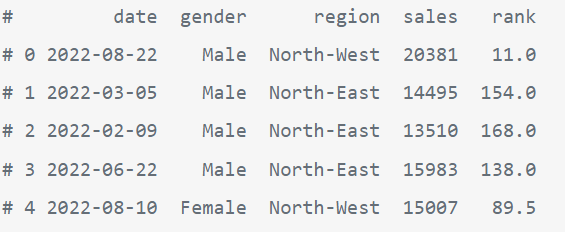

In [ ]:
df['rank'] = df.groupby(['region', 'gender'])['sales'].rank(ascending=False)
print(df.head())

NameError: ignored